## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import functions
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
working_df = pd.read_csv("data/TrainData.csv")
val_df = pd.read_csv("data/TestData.csv")

In [4]:
working_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

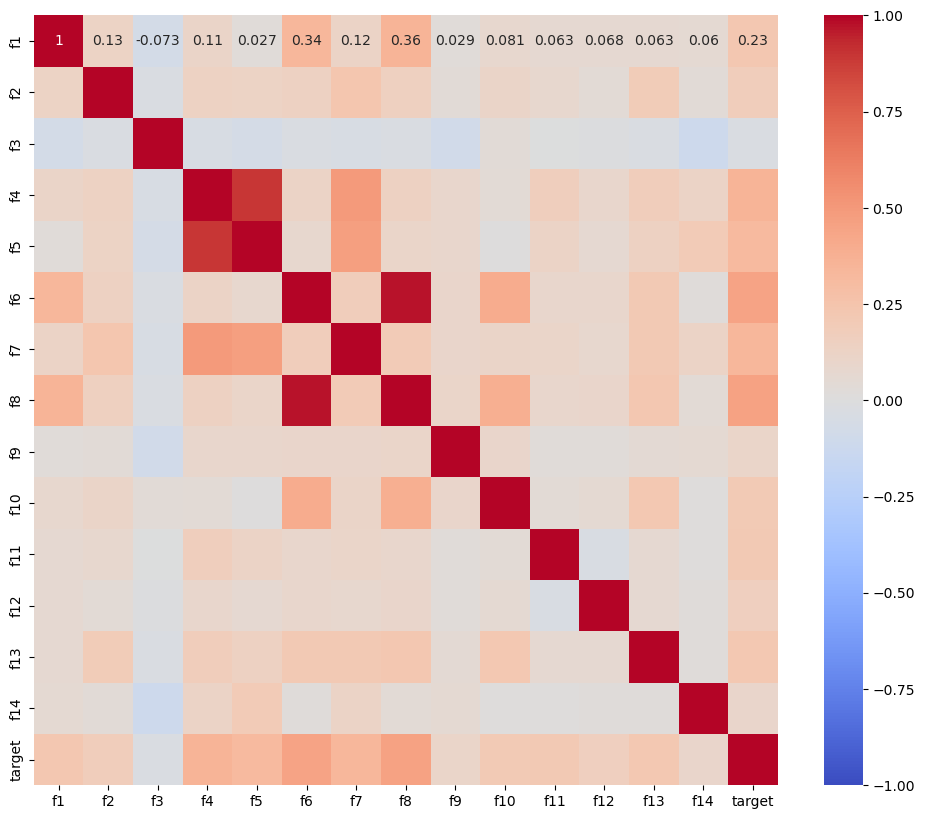

In [5]:
functions.show_corr_matrix(working_df)

##### Удаление сильно коррелированных признаков привело к ухудшению всех моделей.

In [6]:
# working_df = working_df.drop(columns=["f5", "f8"])

In [7]:
print(working_df.info())
print(val_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null

### Вначале попробую заполнить модой. Потом проверю, как будет модель вести себя, если удалить пустые значения

In [8]:
working_df = functions.fill_with_mode(working_df)
# working_df = working_df[~(working_df.isnull().any(axis=1))]
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [9]:
working_df.target.value_counts()

target
0    5708
1    1792
Name: count, dtype: int64

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    working_df.drop(columns=["target"]),
    working_df["target"],
    stratify=working_df["target"],
    test_size=0.25,
    random_state=137,
)
splits = [X_train, y_train, X_test, y_test]

In [11]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
svm = SVC()

models = [knn, logreg, svm]
fit_models = functions.fit_models(models, splits)

functions.evaluate_models(fit_models, splits)

KNeighborsClassifier: 61.60%
LogisticRegression  : 64.55%
SVC                 : 47.70%


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

splits = [X_train_scaled, y_train, X_test_scaled, y_test]

In [13]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

logreg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'],
    'class_weight': ['balanced', None],
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

In [14]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
svm = SVC()

best_knn = functions.tune_model(knn, knn_params, splits)
best_logreg = functions.tune_model(logreg, logreg_params, splits)
best_svm = functions.tune_model(svm, svm_params, splits)

The best parameters for KNeighborsClassifier:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

The best parameters for LogisticRegression:
{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

The best parameters for SVC:
{'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}



In [15]:
best_models = [best_knn, best_logreg, best_svm]
functions.evaluate_models(best_models, splits)

KNeighborsClassifier: 76.14%
LogisticRegression  : 75.96%
SVC                 : 75.59%


In [20]:
logreg_softmax = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    C=1,
    class_weight="balanced",
    penalty="l2",
)

logreg_softmax.fit(X_train_scaled, y_train)

svm_poly = functions.get_svm_poly(splits)

kernel_trick = functions.get_kernel_trick(splits)

In [21]:
unique_models = [logreg_softmax, svm_poly, kernel_trick]
functions.evaluate_models(unique_models, splits)

LogisticRegression  : 76.11%
Pipeline            : 73.88%


In [22]:
ultimate_models = [best_knn, logreg_softmax, best_svm]
functions.evaluate_models(ultimate_models, splits)

KNeighborsClassifier: 76.14%
LogisticRegression  : 76.11%
SVC                 : 75.59%


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

### Конечно, сделаю, но неохотно, т.к. надоть на всём ДФ обучиться бы.

In [25]:
X_test_val = val_df.drop(columns=["target"])
y_test_val = val_df["target"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_val)

splits = [X_train_scaled, y_train, X_test_scaled, y_test_val]

functions.evaluate_models(ultimate_models, splits)

KNeighborsClassifier: 61.39%
LogisticRegression  : 68.96%
SVC                 : 66.43%


### А вот теперь давайте обучим лучшие модели на всём обучающем датасете. Без разделения.

In [26]:
X_train_all = working_df.drop(columns=["target"])
y_train_all = working_df["target"]
X_test_all = val_df.drop(columns=["target"])
y_test_all = val_df["target"]

In [27]:
scaler = StandardScaler()
X_train_scaled_all = scaler.fit_transform(X_train_all)
X_test_scaled_all = scaler.transform(X_test_all)

splits_all = [X_train_scaled_all, y_train_all, X_test_scaled_all, y_test_all]

In [28]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
svm = SVC()

best_knn_all = functions.tune_model(knn, knn_params, splits_all)
best_logreg_all = functions.tune_model(logreg, logreg_params, splits_all)
best_svm_all = functions.tune_model(svm, svm_params, splits_all)

The best parameters for KNeighborsClassifier:
{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

The best parameters for LogisticRegression:
{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

The best parameters for SVC:
{'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}



In [29]:
functions.evaluate_models([best_knn_all, best_logreg_all, best_svm_all], splits_all)

KNeighborsClassifier: 60.66%
LogisticRegression  : 68.62%
SVC                 : 67.79%


In [31]:
# Вдогонку попробую logreg_softmax ещё раз
logreg_softmax = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    C=1,
    class_weight="balanced",
    penalty="l2",
)
logreg_softmax.fit(X_train_scaled_all, y_train_all)

functions.evaluate_models([logreg_softmax], splits_all)

LogisticRegression  : 68.62%


#### Никакой разницы с лучшей логистической регрессией, подобранной по гридсёрчу.

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$
pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2
$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [43]:
import numpy as np
from sklearn.metrics import f1_score

pred_1 = logreg_softmax.predict(X_test_scaled_all)
pred_2 = best_svm_all.predict(X_test_scaled_all)

best_alpha = 0
best_f1 = 0
y_pred_final = None

for alpha in np.linspace(0, 1, 101):
    pred_final = alpha * pred_1 + (1 - alpha) * pred_2
    pred_final_class = (pred_final >= 0.5).astype(int)
    f1 = f1_score(y_test_all, pred_final_class)
    
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha
        y_pred_final = pred_final_class

print(f"Best alpha: {best_alpha:.2}")
print(f"F1-score on test: {best_f1:.2%}")

Best alpha: 0.5
F1-score on test: 52.94%


#### Смешивание не привело к улучшению результата, а наоборот — заметно его ухудшило. Это связано, по всей видимости, с тем, что у нас в таргете значения 0 или 1. Предположительно, данный подход был бы уместен при работе с вероятностями, а не с классами.

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

## Выводы

### Вывод № 1.
Один из основных выводов: время, которое система тратит на обучение модели на невзвешенных числовых значениях во много раз больше, чем она тратит на взвешенные значения. 1 мин 30 сек против хрен знает скольки, т.к. я выключил на 35 минуте. Потом почитал у себя в обсидиане, что, мол, да — нефиг пихать невзвешенные значения в SVM. :)

### Вывод № 2.
Удаление нулевых строк из датасета привело к ухудшению показателей всех моделей без исключения. Удаление сильно коррелированных признаков также привело к ухудшению всех моделей.

### Вывод № 3.
Удивительно, но модели, обученные на неполном датасете, показали результаты чуть-чуть лучше, чем модели, обученные на полном датасете. Я, разумеется, рассчитывал на противоположный результат. Интересно, почему так получилось?

### Вывод № 4.
SVM в данной задаче показал себя не с самой лучшей, но и не с самой худшей стороны. Лучше, чем КНН, но чутка хуже, чем ЛогРег.

### Вывод № 5.
Также некоторое удивление вызвал тот факт, что КНН показал наилучшие результаты на неполном датасете. Однако, он посыпался на отложенной выборке.

### Вывод № 6.
Пробежимся по поставленным в работе вопросам:
- Подходы: наилучшие гиперпараметры по гридсёрчу, удаление нулевых строк (fail), удаление коррелированных признаков (fail), создание уникальных моделей, таких как logreg_softmax (success на неполном датасете), SVM на полиномиальных признаках (fail), SVM с полиномиальным ядром (fail). Фейлы уникальных СВМ, по всей видимости, связаны с тем, что облака значений лучше делятся прямой, а не кривой и, по большей части, однородны. 
- Как отмечал в п. 5, максимальное на тесте получил КНН, однако ему жарко дышала в спину логистическая регрессия на софтмаксе (76,14 и 76,11% соответственно). Такой выдающийся результат КНН, очевидно, связан с тем, что я отмечал уже выше: облака значений лучше делятся прямой, а не кривой и, по большей части, однородны, соответственно расстояния между значениями незначительны, что позволило КНН вырвать победу из когтистых лап соперников в данном зачёте.
- На отложенной выборке КНН полностью сдулся, и вперёд стремительным домкратом вырвалась логистическая регрессия, на почётном втором месте обосновался СВМ (60.66, 68.62 и 67.79% соответственно).
- Учитывая, что значений было не сказать что много, ДФ несбалансирован, а про исходные признаки мы ничего не знали и по этой причине не смогли создать более точные признаки на их основе, мы добились впечатляющих результатов. Модели обучились замечательно.

### Вывод № 7.
Файл регистрации изменений рулит. Надо вести в обязательном порядке. 

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.